# Sensor Classification Challenge
##### By Lucas W. Blasdel


### Challenge overview:
The data provided for the coding challenge contains 400 sample readings from ten sensors. Each sensor, labeled ‘sensor 0’ through ‘sensor 9’ produce a single FLOAT with a value between 0.0 and 1.0 while the samples themselves are divided into two classes - ‘Class 1’ and ‘Class -1.’ The primary goal of this challenge was to determine which of the 10 sensors was the most important or best at predicting the class label.

### Results:
My approach involves a multi-step process which entails the use of cross validation of the data and the repeated training and scoring of ten independent decision trees. 

        1. for sensor 6, the average score was: 0.9954
        2. for sensor 1, the average score was: 0.8972
        3. for sensor 8, the average score was: 0.8816
        4. for sensor 2, the average score was: 0.8697
        5. for sensor 4, the average score was: 0.836
        6. for sensor 0, the average score was: 0.8098
        7. for sensor 3, the average score was: 0.7034
        8. for sensor 5, the average score was: 0.6998
        9. for sensor 9, the average score was: 0.66
        10. for sensor 7, the average score was: 0.6046
 
__Method__:
- To achieve this result, I performed a train_test_split with 80 percent of the data being used for training and 20 percent of the data being used for validation. I trained 10 decision trees - one for each sensor input. The only parameter specified for the decision tree was minimum number of samples per leaf node which was set to 10. I then computed their respective F1-scores and stored them in a dictionary. I  repeated this process 1000 times (each time performing a new train_test split to change the validation data) and averaged scores and then ranked the sensors by these average scores. Since I was working with a relatively small samplesize, it was necessary to perform multiple train test splits.


In [33]:
# data imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from scipy.stats import normaltest
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import os

os.listdir()

['Exploratory.ipynb',
 '.DS_Store',
 'complete_work.ipynb',
 'rankings.py',
 'task_data.csv',
 'ranking_script.py',
 '.ipynb_checkpoints']

### Code used to achieve this result:
this code was copied from further down in this jupyter notebook. This represents the method used to answer the challenge question.

In [9]:
#loading Data
path = 'task_data.csv' #specifies path to CSV file
df_original = pd.read_csv(path) # loads data

df_original.drop(['sample index'], axis = 1, inplace = True) #the column labeled - 'sample index' - was superfluous and was therefore dropped

#separates data
y = df_original.class_label
X = df_original.drop(['class_label'], axis = 1)

In [3]:
# this will take a few seconds to run

np.random.seed(0) # this number is set for reproducibility of values

num_iterations = 1000 

#creates a dictionary of lists to specify
scores = {col:[] for col in X.columns}

for x in range(num_iterations):
    #creating a new random train test split for cross validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
    
    for col in X.columns:
        #creates a decision tree for each sensor and saves score
        dtc = DecisionTreeClassifier(min_samples_leaf = 10)
        dtc.fit(X_train[[col]], y_train)
        score = dtc.score(X_test[[col]], y_test)
        scores[col].append(score) # appends score to dictionary based on sensor name

#creates and sorts a list of tuples containing the sensor name and it's ave vale
results = list((key, np.mean(val)) for key, val in scores.items())
results.sort(key = lambda x: x[1], reverse = True)

In [5]:
# creates printout of results

print(f"Sensor Rankings based on the f1-scores Decision Tree Classifier:")
print('------------------------------------------ \n')

for num, result in enumerate(results):
    print(f'{num+1}. Sensor {result[0][-1]} - ave f1-score was: {np.round(result[1], 4)}')
    

Sensor Rankings based on the f1-scores Decision Tree Classifier:
------------------------------------------ 

1. Sensor 6 - ave f1-score was: 0.9954
2. Sensor 1 - ave f1-score was: 0.8972
3. Sensor 8 - ave f1-score was: 0.8816
4. Sensor 2 - ave f1-score was: 0.8697
5. Sensor 4 - ave f1-score was: 0.836
6. Sensor 0 - ave f1-score was: 0.8098
7. Sensor 3 - ave f1-score was: 0.7034
8. Sensor 5 - ave f1-score was: 0.6998
9. Sensor 9 - ave f1-score was: 0.66
10. Sensor 7 - ave f1-score was: 0.6046


# Additional Work
-----------------------------------------------------------------------
#### Warning
All the notebook below represents the step by step process as to how I came to the results and reflects my thinking process at each step and how I came to my final result. I make several staments or claims that I later found out to be incorrect or that led to nowhere. I decided to keep this more or less unedited to provide the reader info on how I went about tackling this problem. There may be some redundant code in this. For a concise report, please see the analysis.pdf.

### Importing and Processing Data
this process was relatively straightforward and required simpling importing the CSV file into a pandas dataframe. The sensors were already normalized between 0 and 1. After the data was loaded, I performed a simple train_test split with a training size of .8 as there were not many data points to work with. I set a random_state = 42 incase someone wishes to reproduce the results.

In [11]:
# data importation

df_original = pd.read_csv(path)
df_original.drop(['sample index'], axis = 1, inplace = True) #the column labeled - 'sample index' - was superfluous and was therefore dropped

df_original.head()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


In [12]:
y = df_original.class_label
X = df_original.drop(['class_label'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

print(f'number of values in training set: {len(X_train)}')
print(f'number of values in testing set: {len(X_test)}')

number of values in training set: 320
number of values in testing set: 80


### Preliminary data check & visualizations
I performed a simple preliminary check to see how the data looked and whether or not the data was normally distributed. To do this, I used the normaltest available from scipy.stats and set an alpha value of .001. For values less than this, we can conclude that the data isn't normally distributed. Seaborn was used to get a quick visual representation of how the data is distributed within each cell. Finally, I plotted 4000 random evenly distributed points to see visually see if the values in the dataframe are roughly similar

In [13]:
# checking if the data is normal. 
# Values less than .001 indicate that the data is not normally distributed
for col in X.columns:
    k2, px = normaltest(X[[col]])
    print(f'{col}: {px[0]}')

sensor0: 1.267973882202484e-25
sensor1: 7.380814163213928e-23
sensor2: 8.40856769111682e-46
sensor3: 8.241968902083658e-76
sensor4: 1.2378811904416887e-41
sensor5: 5.530523867259659e-48
sensor6: 3.1574293599062736e-39
sensor7: 6.636747383109065e-48
sensor8: 1.4993185385029108e-61
sensor9: 9.842595431920583e-18


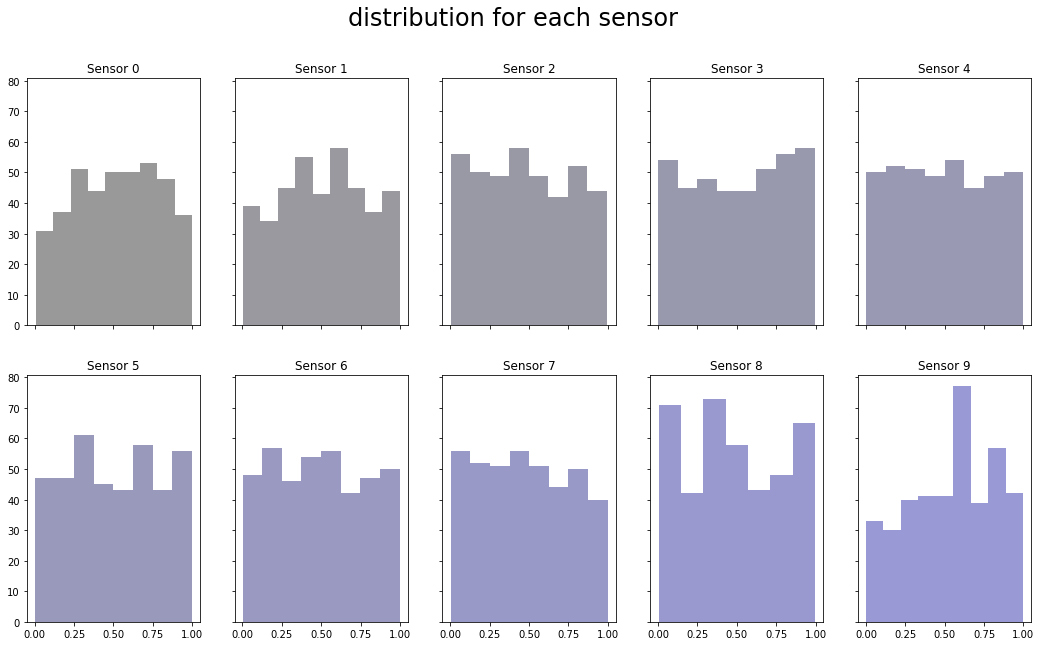

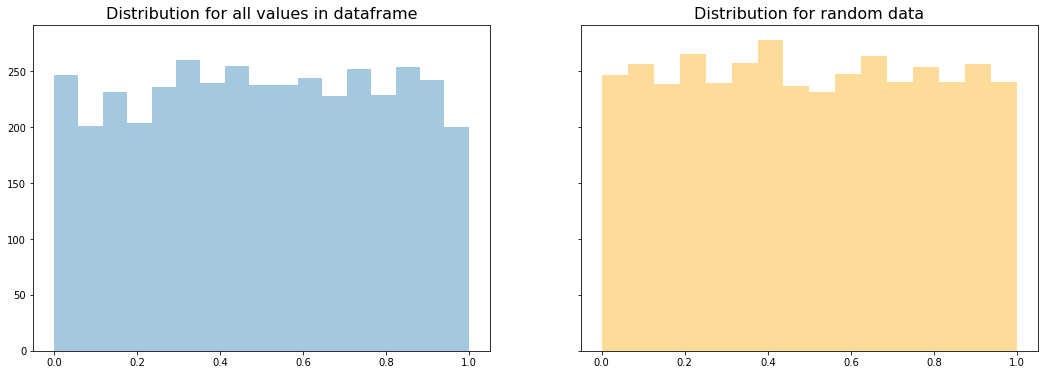

In [14]:
#checking normality and the shape of the distribution. I decided to set an arbitrary alpha for the normal test at .001
from scipy.stats import normaltest

colors = [f'#0000{x}{x}' for x in range(10)]
# check each individual column
fig, axes = plt.subplots(2, 5, figsize = (18,10), sharex = True, sharey = True)
plt.suptitle('distribution for each sensor', fontsize=24)
for num, col in enumerate(X.columns):
    k2, px = normaltest(X[[col]])
    sns.distplot(X[[col]], kde=False, color = colors[num], ax=axes[num//5, num%5])
    axes[num//5, num%5].set_title(f'Sensor {num}')

plt.show()


fig, axes = plt.subplots(1, 2, figsize = (18,6), sharex = True, sharey = True)

X_values = np.ravel(X.values)
axes[0].set_title('Distribution for all values in dataframe', fontsize=16)
sns.distplot(X_values, kde=False, ax = axes[0])

X_random = np.random.random(4000) # this will create 4000 points that are evenly distributed between 1 and 0.
axes[1].set_title('Distribution for random data', fontsize=16)
sns.distplot(X_random, kde=False, color = 'orange', ax = axes[1])
plt.show()



### Thoughts after preliminary visual analysis
- After performing a normaltest, it is clear that non of the sensors contain a normally distributed data set as all the values were many orders of magnitude below the alpha value of .001

- When plotting each of the subplots, it appears that the data is evenly distributed from 0 to 1. This fact is further cooberated by looking at the distribution of all the values in the data sets and comparing that to a randomly generated data set


### Correlation Analysis
For this step, I looked at how the data relates to the class labels. The most rudimentary and visual way of doing this is with correlation Matrix which checks to see how each variable linearly relates to one another. In addition to this, I created scatterplot for each sensor and the class label to see if there were any other relationships that the correlation matrix was missing.

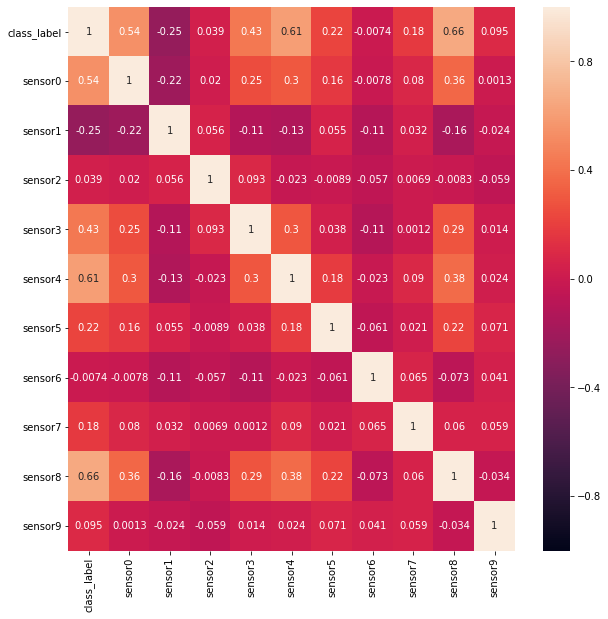

In [15]:
corrM = df_original.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corrM, annot=True, vmin = -1, vmax = 1);

### Initial Observations for correlation Matrix:
- There appears to be a strong positive linear correlation between sensors 8, 4, 0 and 3 and the class label. In addition to this, there is a negative correlation for sensor 1 of -.25 and the target data.
- There also may be some issues with colinearity amongst the data points. Performing a Principle component analysis would help to reduce this and will be performed later.
- Since there already exists a strong linear correlation with several of the sensors, a logistic regression could possibly provide a good base model in determining which sensors are the best predictors

### Plotting each sensor with respect to Class

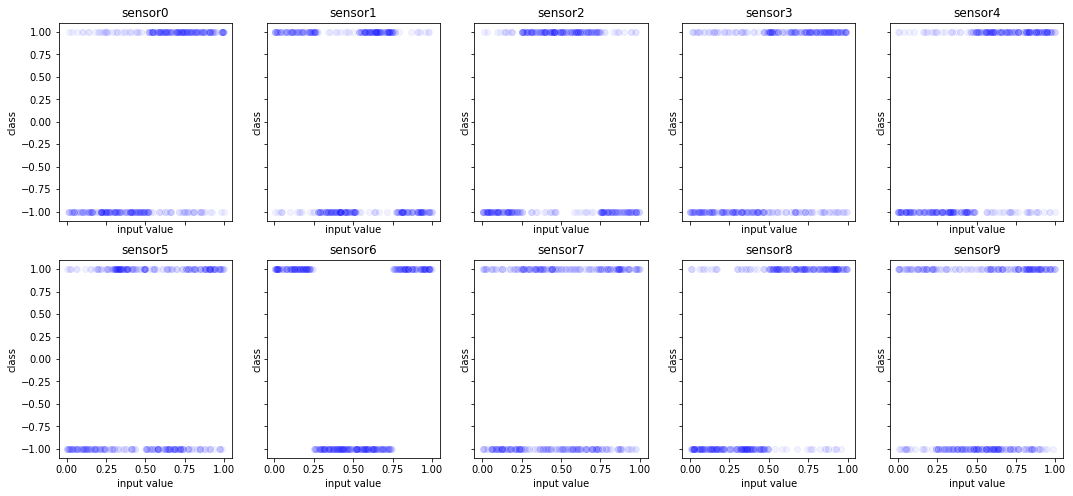

In [16]:
# this will plot the 
fig, axes = plt.subplots(nrows=2, ncols=5, sharey=True, sharex=True, figsize = (18,8))
for num, col in enumerate(X.columns):
    axes[num//5, num%5].plot(X[col], y, 'bo', alpha = .05)
    axes[num//5, num%5].set_title(f'{col}')
    axes[num//5, num%5].set(xlabel = 'input value', ylabel = 'class')

### Further qualitative observations:
- after plotting the data, it appears that sensor 6 is also an extremely good candidate for predicting whether the information falls into class 1 or -1.
- Sensor 6 didn't appear to show any correlation with the initial linear correlation test, this is because the correlation appears to be inheritantly non-linear.
- There may be some edge case issues for sensor 6 around .25 and .75 but else where, sensor 6 appears to be nearly perfect.
- additional sensors that appear to be good indicators and operate as a single step function are sensors: 0, 4, and 8. In addition to this, sensors: 1, 2, and possibly 5 appear to also be good predictors but aren't a single step function.
- sensors 7 & 9 appear to show little relation between their input values and the target values
- After these initial observations, a simple logisitc regression will NOT do a good job at predicting these.  Due to the sharp jumps from one class to another in several of the sensors, a Gradient Boosted Classifier should do an excellent job of caputuring this fact.

### MODEL 1 - Gradient Boosted Classifier
Due to the results from the graphs, I believe that a Gradient Boosted Classifier should do an excellent job of modeling the data. I used a random_state of 42 for reproducibility. The f1 - score is used as it accounts for both the accuracy and the recall of the model. After this, I looked at the models feature importance to rank order the sensors

In [17]:
# modeling the initial data

gbc = GradientBoostingClassifier(random_state = 42)

gbc.fit(X_train, y_train)

train_score = gbc.score(X_train, y_train)
test_score = gbc.score(X_test, y_test)

print(f'the f1_score for the training set was: {train_score}')
print(f'the f1_score for the testing set was: {test_score}')

the f1_score for the training set was: 1.0
the f1_score for the testing set was: 1.0


In [18]:
# ranking the features of the model by importance

results = list(zip(X.columns, gbc.feature_importances_))
results.sort(key = lambda x: x[1], reverse = True)

for x in range(len(results)):
    print(f'{x+1}. {results[x][0]}')

1. sensor8
2. sensor6
3. sensor2
4. sensor4
5. sensor0
6. sensor1
7. sensor3
8. sensor5
9. sensor9
10. sensor7


# Post-model 1 Observations:
- The model appears to do an excellent job predicting whether or not an input vector belongs to class 1 or class -1. With an f1-score of 1.0 on unseen data, one can be fairly confident in the model's accuracy and recall.
- While the model is excellent at predicting the correct class, I do not agree with the feature importance that the model produced. Looking at the plots, it is clear that sensor 6 is much better at predicting the results than sensor 8 is. Looking at the graph of sensor, values between .25 and .75 are always classified as -1 while values outside this range are always classified as 1. 
- The most probable reason why this occurs has to do with how a Gradient Boosted Classifier works. The GBC performs one split at a time and tries to minimize the amount of entropy after each split. Since a single split in sensor 8 input will do a better job of chategorizing the data than a single split in sesor 6 input, the model incorrectly assigns sensor 8 a higher feature importance.
- In short the model tends to undervalue the importance of sensors that require multiple splits to accurately represent the data and thus sensors 1, 2, 5, 6 and possibly 9 are unfairly ranked as a result

### Further Analysis
- To fix this, and making the assumption that the input sensors are independent from one another, I decided to create a decision tree for each sensor individually to see how useful they are in predicting the data. To protect these simple models from overfitting, I required that each leaf have at least twenty components in order for splitting to occur. A random seed was set for reproducibility. Since we are fitting a single input to a single output, bagging techniques, such as random forests and boosted forests won't be necessary

In [19]:
np.random.seed(43)

scores = [] # this will store a tuple containing the sensor used and it's valdation score
for col in X.columns:
    dtc = DecisionTreeClassifier(min_samples_leaf = 10) #since we are fitting a single input to a single
    dtc.fit(X_train[[col]], y_train)


    score = dtc.score(X_test[[col]], y_test)
    scores.append((col, score))
    
# sorts the decision tree based on their respective validation scores.
scores.sort(key = lambda x: x[1], reverse = True)

This will print out a ranking for how important each sensor is at predicting the class label. The file will be saved as a 'sensor_ranks.txt'

In [20]:
# this will print out a report for how important each decision

f = open("../results/sensor_ranks.txt", "a")

print("final f1 scores for individual decision trees:\n----------------------------------------------", file = f)
for num, score in enumerate(scores):
    print(f'{num + 1}. {score[0]} - validation score: {score[1]}', file=f)
    
f.close()

print("final f1 scores for individual decision trees:\n----------------------------------------------")
for num, score in enumerate(scores):
    print(f'{num + 1}. {score[0]} - validation score: {score[1]}')

final f1 scores for individual decision trees:
----------------------------------------------
1. sensor6 - validation score: 1.0
2. sensor1 - validation score: 0.9875
3. sensor2 - validation score: 0.9
4. sensor4 - validation score: 0.85
5. sensor8 - validation score: 0.85
6. sensor0 - validation score: 0.8
7. sensor5 - validation score: 0.675
8. sensor9 - validation score: 0.65
9. sensor3 - validation score: 0.6375
10. sensor7 - validation score: 0.55


##### Timing the models
for real life applications, the time it takes a model to train and also to classify data can be extremely important. I decided to compare the speed at which it takes a GBC mode to make a prediction and compare it to a simple decision tree. To measure this, I used python's timeit package. 

I am using a large quantity of artificially generated data to simulate the difference in speed between the two methods and demonstrate why a simple decision tree may perform much faster when scale to a real world setting

In [21]:
#creating a decision tree classifier that relies soley on sensor 6
dt6 = DecisionTreeClassifier(min_samples_leaf = 30) #since we are fitting a single input to a single
dt6.fit(X_train[['sensor6']], y_train)


#creating large random artificially generated data to see how the models behave
dt6_test = np.random.random((10000)) 
gbc_test = np.random.random((10000, 10))

gbc_list = []
dt6_list = []

for _ in range(100):
    #GBC timer
    start_gbc =  timer()
    gbc.predict(gbc_test)
    end_gbc =  timer()

    
    gbc_list.append((end_gbc - start_gbc)) #converts to ms


    # decision tree timer
    start_dt6 =  timer()
    dt6.predict(dt6_test.reshape(-1,1))
    end_dt6 =  timer()


    dt6_list.append((end_dt6 - start_dt6)) #convert to ms


gbc_time = np.mean(gbc_list)*1000 
dt6_time = np.mean(dt6_list)*1000
    
print(f'The average time for GBC - GradientBoostedClassifier - prediction is: {np.round(gbc_time, 3)} ms')
print(f'The average time for dt6 - DeciscionTree on sensor 6 - prediction is: {np.round(dt6_time, 3)} ms')

print(f'speed increase: {np.round(gbc_time/dt6_time - 1, 3)* 100}%')



The average time for GBC - GradientBoostedClassifier - prediction is: 15.237 ms
The average time for dt6 - DeciscionTree on sensor 6 - prediction is: 0.418 ms
speed increase: 3540.9999999999995%


### Findings/disucssion
- After creating a series of individual decision trees, I believe that sensor 6 is the best at predicting whether or not the target belongs to class -1 or class 1
- Though both the Gradient Boosted Classifier and the 1 parameter decision tree had an f1-score of 1.0, the simple decision tree is arguably a better model as it is computationally far less difficult to train and compute than the gradient boosted forest.
- Though this time difference is insignificant with the amount of data initially provided, for a large industry that could potentially be processing terabytes of data, having a model that runs over an order of magnitude faster can be quite important. This difference is negligible for smaller data sets
- If the data is computationally cumbersome or the cost of operating a sensor is expensive, then there is a significant advantage using a simple decision tree based soley on sensor 6.
- since a model can accurately predict the class label from sensor 6 alone and since many of the sensors are also by themselves good predictors of the class label, one can firmly conclude that the sensors are extremely redundant.
- In a real life situation, another possible situation may be that the sensors are susceptible to failure. Both the Gradient Boosted model and the Decision Tree would be seriously affected if this were the case. One solution to this would be to take advantage of the serious redudancies in the data and use them to create a voting classifier that votes based on majority rule



### Demonstration of shortcomings:
I simulated sensor error by replacing the sensor 6 data in the X_test array with randomly generated data and compared how it affected the f1-score. I then wrote a function that acted as a rudimentary votinc classifier to take advantage of the redundancy within the data.


In [22]:
# demonstration of the short comings of the DT6 and the GBC classifiers.
np.random.seed(42)

dt6_score = dt6.score(X_test[['sensor6']], y_test)
gbc_score = gbc.score(X_test, y_test)

#this will create the changed values for sensor 6 
X_faulty_test = X_test.copy() 
X_faulty_test['sensor6'] = np.random.random(80)

faulty_dt6_score = dt6.score(X_faulty_test[['sensor6']], y_test)
faulty_gbc_score = gbc.score(X_faulty_test, y_test)



print('results - with fauly input values: \n---------------------------------------')
print(f'the f1_score for the the simple decision tree with faulty data: {faulty_dt6_score}')
print(f'the f1_score for the the simple decision tree with good data: {dt6_score}')
print(f'the f1_score for the gradient boosted classifier with faulty data: {faulty_gbc_score}')
print(f'the f1_score for the gradient boosted classifier with good data: {gbc_score}')

results - with fauly input values: 
---------------------------------------
the f1_score for the the simple decision tree with faulty data: 0.5375
the f1_score for the the simple decision tree with good data: 1.0
the f1_score for the gradient boosted classifier with faulty data: 0.5375
the f1_score for the gradient boosted classifier with good data: 1.0


[Text(133.92000000000002, 181.2, 'X[0] <= 0.247\ngini = 0.499\nsamples = 320\nvalue = [166, 154]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 80\nvalue = [0, 80]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 0.749\ngini = 0.427\nsamples = 240\nvalue = [166, 74]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 166\nvalue = [166, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 74\nvalue = [0, 74]')]

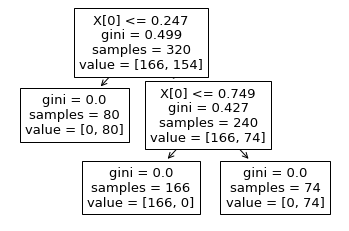

In [23]:
plot_tree(dt6) 

### post demo observations:
 - as one can see, the model's f-score is greatly affected when one of the most import parameters is altered to random data. 
 - in addition it looks like the gradient boosted classifier and the decision tree seem to be equally affected when presented with faulty data for the sensor 6 parameter. This further solidifies the notion that the sensor 6 is by far the best predictor and that the best_features attribute from the GradientBoostedClassifier doesn't accurately reflect the most important features

### Voting Classifier Model
- this model will create 10 decision trees for each sensor, it will then compute the predictions for each model and multiply those predictions by the f1-score on the training data. This is to weight scores based on how effective they are individually at predicting results. Lastly, there is a threshold that can be set to remove an trees that perform worse than a desired amount. This set up will take advantage of the huge redudancy and shouldn't be adversely affected if individual sensors fail.
- The votingclassifier from sklearn wasn't used because it doesn't allow you to use pre-fit models so I wrote my own classifier.

In [24]:
# voting classifier function
def voting_classifier(X_test_, threshold = .7):
    """this function will take in a list of given input values and return an output"""
    estimators = []
    for num, col in enumerate(X.columns):
        exec(f'dt{num} = DecisionTreeClassifier(min_samples_leaf = 20).fit(X_train[[col]], y_train)')
        exec(f'w{num} = dt{num}.score(X_train[[col]], y_train)')
        exec(f'pred{num} = dt{num}.predict(X_test_[[col]])')
        exec(f'estimators.append((w{num}, pred{num}))')
        
    estimators_filtered = list(filter(lambda x: x[0] >= threshold, estimators))

    classified_array = np.zeros(len(X_test_))
    for matrix in estimators_filtered:
        classified_array += matrix[1]
        
    classified_list = list(map(lambda x: 1 if x > 0 else -1, list(classified_array)))
    return classified_list

In [25]:
np.random.seed(42)

# original unaltered data
preds = voting_classifier(X_test, threshold = .8)
score = f1_score(y_test, preds)

# faulty data
preds_faulty = voting_classifier(X_faulty_test, threshold = .8)
score_faulty = f1_score(y_test, preds_faulty)

print(f'the score for the unaltered data set was: {score}')
print(f'the score for the faulty set was: {score_faulty}')

the score for the unaltered data set was: 1.0
the score for the faulty set was: 0.9662921348314606


### Cross Validating Data:
I performed a series of several thousand train_test_splits to demonstrate one of the shortcomings of using one decision tree. 

### Thoughts on the Voting Classifier
- By using a simple voting classifier, I was able to take advantage of the redudancy in the data and create a new classifier that is protected against any individual sensor failing.
- This is a rough classifier and still has many drawbacks and is probably significantly slower in making decisions than the previous two classifiers. It therefore makes sense to use this classifier in a situation where there is a small chance that any single sensor may fail and shouldn't be used or else should be rewritten if speed is a primary concern.

## Cross Vaidated Data:
Method used for final answer.

In [30]:
num_iterations = 1000

#creates a dictionary of lists to specify
scores = {col:[] for col in X.columns}

for x in range(num_iterations):
    #creating a new random train test split for cross validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
    
    for col in X.columns:
        dtc = DecisionTreeClassifier(min_samples_leaf = 10) #since we are fitting a single input to a single
        dtc.fit(X_train[[col]], y_train)
        score = dtc.score(X_test[[col]], y_test)
        # appends  
        scores[col].append(score)

#creates and sorts a list of tuples containing the sensor name and it's ave vale

results = list((key, np.mean(val)) for key, val in scores.items())
results.sort(key = lambda x: x[1], reverse = True)


In [31]:
print(f"average scores for each sensor over {num_iterations} iterations:")
print('----------------------------------------------------------- \n')

for result in results:
    print(f'for {result[0]}, the average score was: {np.round(result[1], 4)}')

average scores for each sensor over 1000 iterations:
----------------------------------------------------------- 

for sensor6, the average score was: 0.9959
for sensor1, the average score was: 0.8972
for sensor8, the average score was: 0.8824
for sensor2, the average score was: 0.8692
for sensor4, the average score was: 0.8365
for sensor0, the average score was: 0.8086
for sensor3, the average score was: 0.7006
for sensor5, the average score was: 0.699
for sensor9, the average score was: 0.6593
for sensor7, the average score was: 0.6024


In [28]:
### Saving Results

In [29]:
f = open("../results/sensor_ranks.txt", "w")

print(f"Sensor Rankings based on the f1-scores Decision Tree Classifier:", file = f)
print('------------------------------------------ \n', file = f)

for num, result in enumerate(results):
    print(f'{num+1}. Sensor {result[0][-1]} - ave f1-score was: {np.round(result[1], 4)}', file = f)
    
f.close()
